In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DF = pd.read_excel("PQM Dataset.xlsx", sheet_name = "Frequency_1 hrs")

In [6]:
print("Data Shape:", DF.shape)
print("\nFirst few rows:\n", DF.head())
print("\n")
print("\nBasic info:\n", DF.info())
print("\nDescriptive statistics:\n", DF.describe())
print("\nNumber of missing values in each column:\n", DF.isnull().sum())

Data Shape: (6005, 7)

First few rows:
    TimeID     Col_1     Col_2     Col_3     Col_4     Col_5     Col_6
0       1  50.00761  50.00724  50.00784  50.00724  50.00784  50.00761
1       2  50.00761  50.00748  50.00770  50.00748  50.00770  50.00761
2       3  50.00761  50.00747  50.00780  50.00747  50.00780  50.00761
3       4  50.00763  50.00745  50.00788  50.00745  50.00788  50.00763
4       5  50.00761  50.00731  50.00777  50.00731  50.00777  50.00761


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TimeID  6005 non-null   int64  
 1   Col_1   6005 non-null   float64
 2   Col_2   6005 non-null   float64
 3   Col_3   6005 non-null   float64
 4   Col_4   5162 non-null   float64
 5   Col_5   5162 non-null   float64
 6   Col_6   5162 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 328.5 KB

Basic info:
 None

Descriptive statistics:
   

In [10]:
cleanDF = DF.fillna(DF.mean())

In [11]:
def find_mean(data):
    mean = np.mean(data)
    return mean

def find_median(data):
    median = np.median(data)
    return median

def find_std_dev(data):
    std_dev = np.std(data)
    return std_dev

Statistics for each column:


Column: Col_1
Mean: 3003.0000
Median: 3003.0000
Standard Deviation: 1733.4942


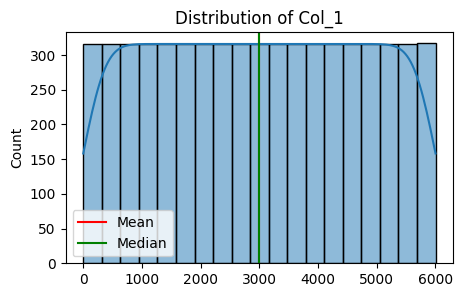


Column: Col_2
Mean: 50.0076
Median: 50.0076
Standard Deviation: 0.0563


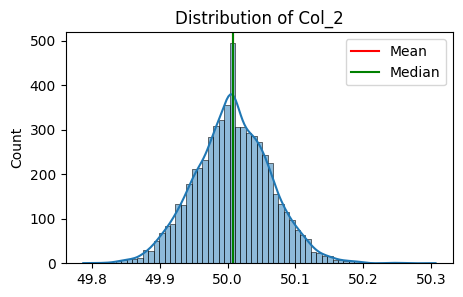


Column: Col_3
Mean: 49.7685
Median: 49.7726
Standard Deviation: 0.0875


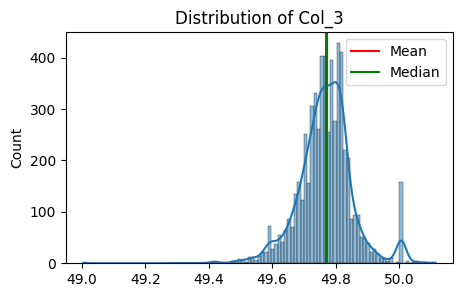


Column: Col_4
Mean: 50.2139
Median: 50.2124
Standard Deviation: 0.0877


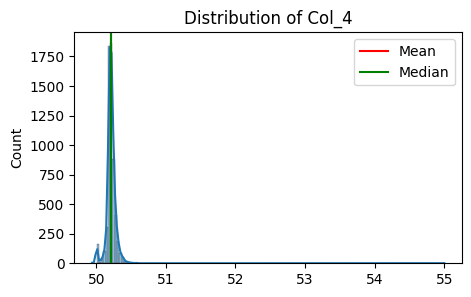


Column: Col_5
Mean: 49.7768
Median: 49.7768
Standard Deviation: 0.0778


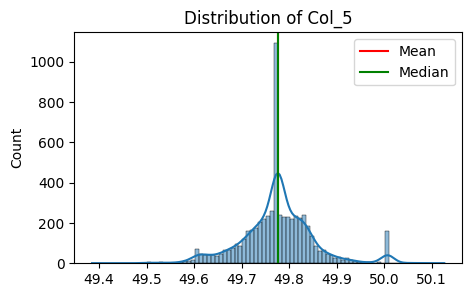


Column: Col_6
Mean: 50.2043
Median: 50.2043
Standard Deviation: 0.0573


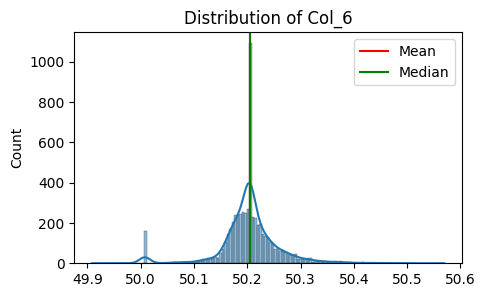

In [12]:
# calculating statistics for each column
print("Statistics for each column:\n")

cols = [col for col in cleanDF.columns if col != 'TimeID']

for i, column in enumerate(cols):
    data = cleanDF.iloc[:, i].values
    
    print(f"\nColumn: {column}")
    print(f"Mean: {find_mean(data):.4f}")
    print(f"Median: {find_median(data):.4f}")
    print(f"Standard Deviation: {find_std_dev(data):.4f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data, kde=True)
    plt.axvline(find_mean(data), color='red', label='Mean')
    plt.axvline(find_median(data), color='green', label='Median')
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()
    


Outliers for each column (Z-score > 3):


Column: Col_1
Number of outliers: 23


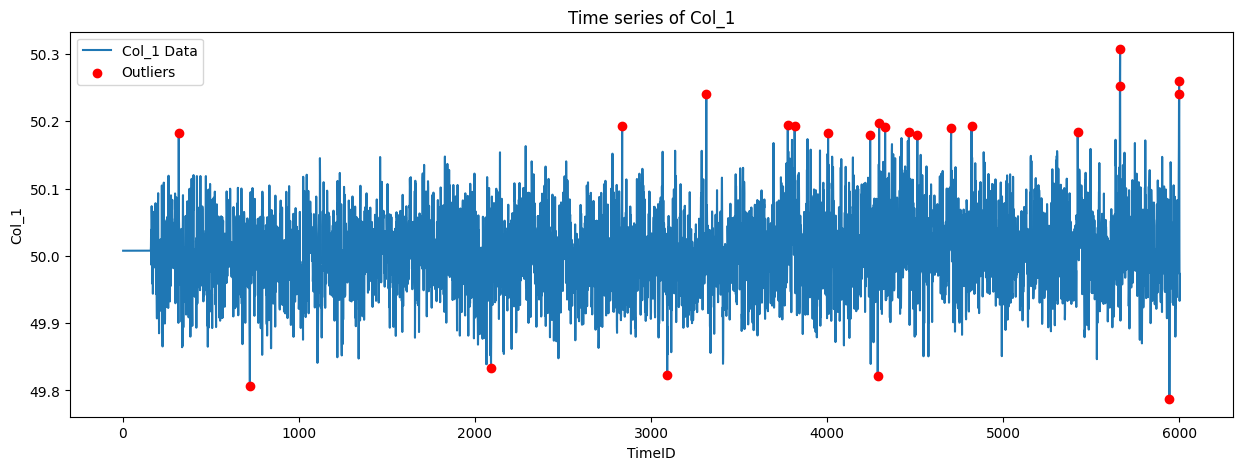


Column: Col_2
Number of outliers: 52


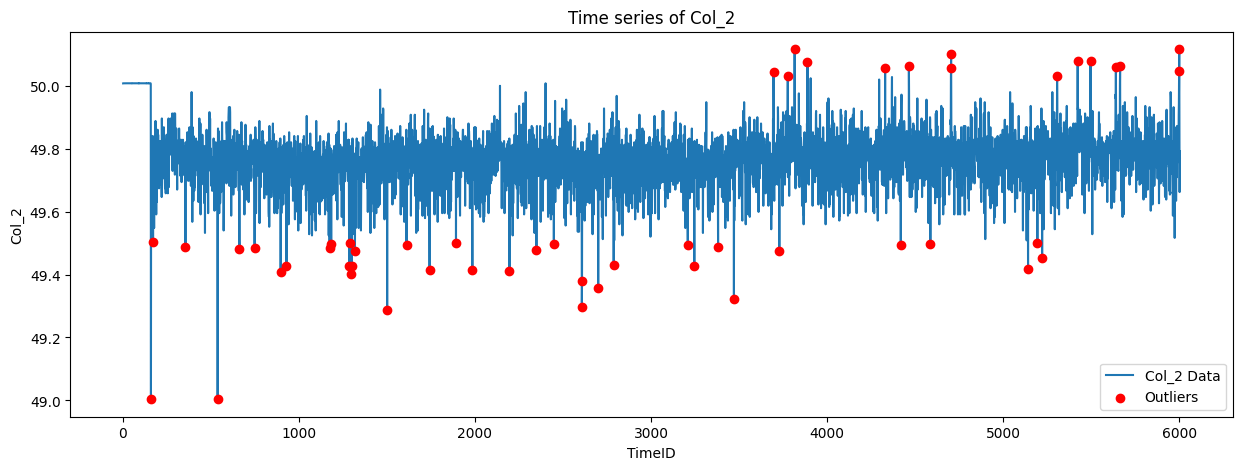


Column: Col_3
Number of outliers: 18


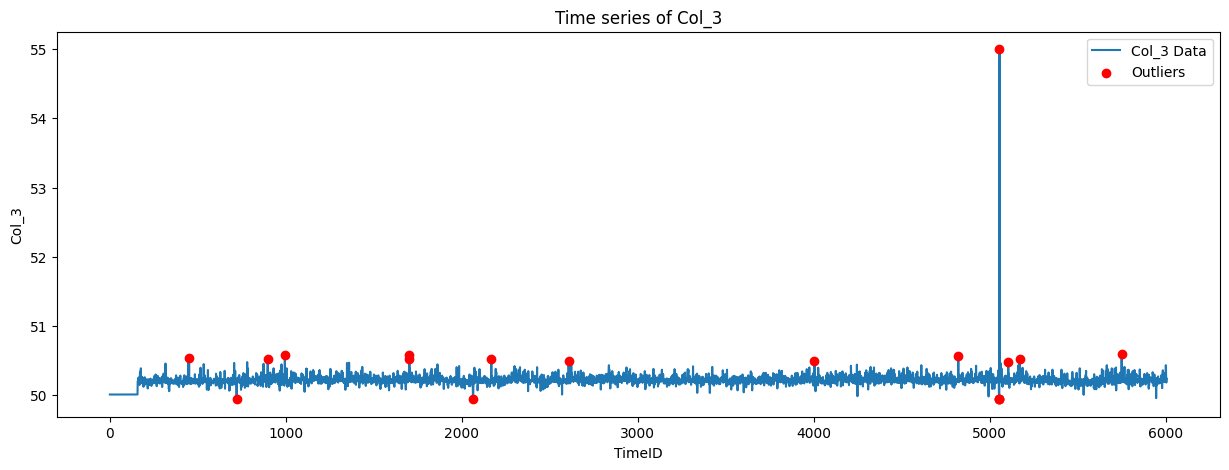


Column: Col_4
Number of outliers: 37


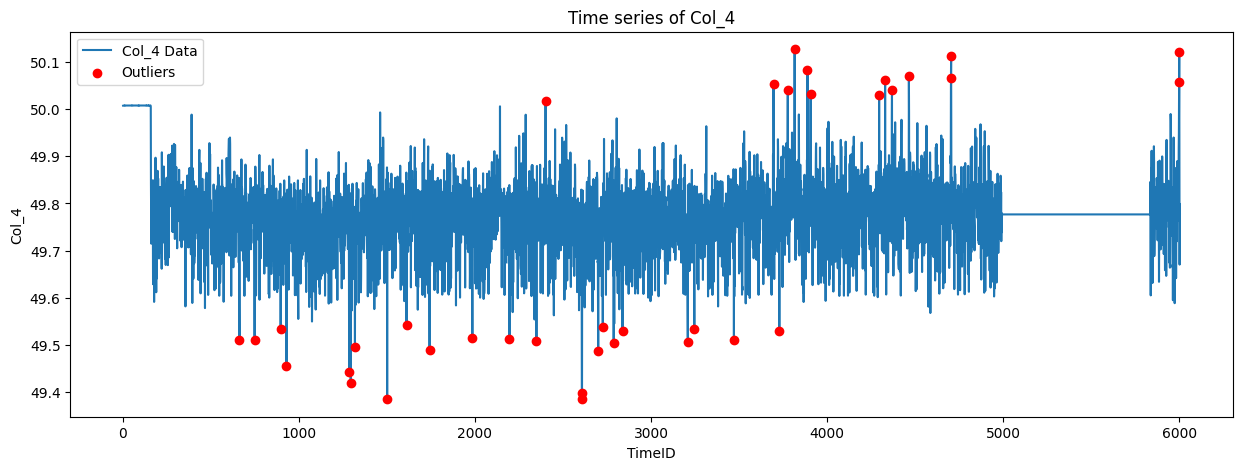


Column: Col_5
Number of outliers: 218


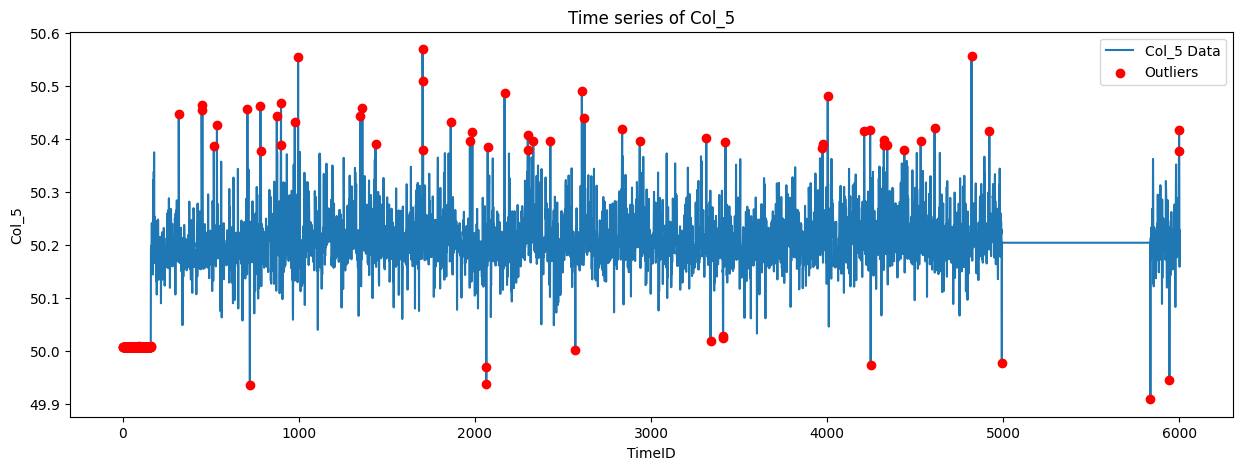


Column: Col_6
Number of outliers: 40


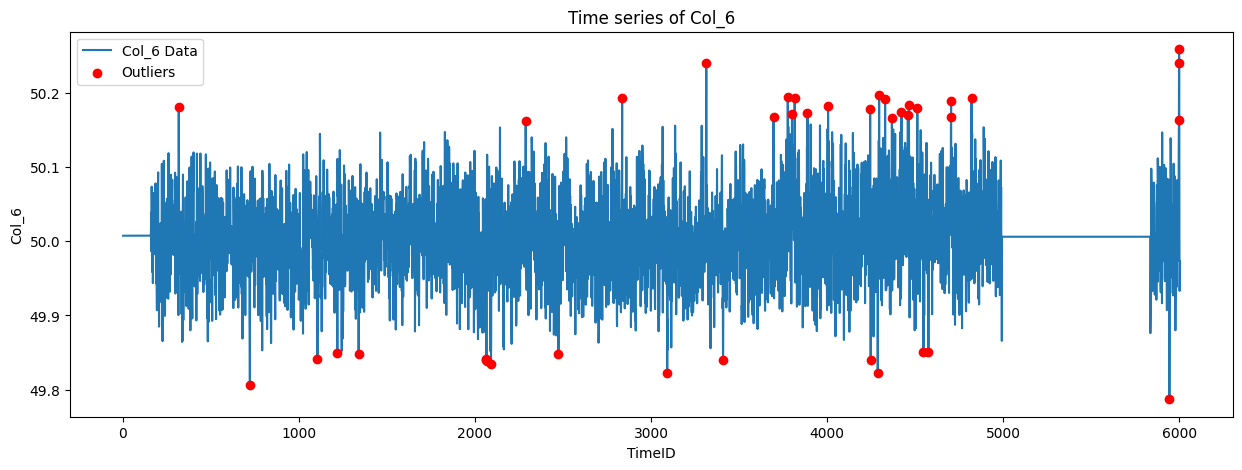

In [16]:
# calculating outliers using Z-scoring
print("\nOutliers for each column (Z-score > 3):\n")

columns = [col for col in cleanDF.columns if col != 'TimeID']
time_data = cleanDF['TimeID'].values

for column in columns:
    feature_data = cleanDF[column].values
    
    mean = find_mean(feature_data)
    std_dev = find_std_dev(feature_data)
    
    z_scores = (feature_data - mean) / std_dev
    outliers = np.abs(z_scores) > 3
    
    print(f"\nColumn: {column}")
    print(f"Number of outliers: {np.sum(outliers)}")
    
    plt.figure(figsize=(15, 5))
    plt.plot(time_data, feature_data, label = f'{column} Data')
    plt.scatter(time_data[outliers], feature_data[outliers], color='red', label= 'Outliers', zorder = 5)
    plt.title(f"Time series of {column}")
    plt.xlabel("TimeID")
    plt.ylabel(column)
    plt.legend()
    plt.show()